# Predicting the Output - Model Selection

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Analysis


Storing the given data as a numpy array

In [40]:
data = [[0.0, 0.0, 0.0], [0.5, 1.5, 23.4], [1.2, 2.3, 45.6], [1.8,
3.7, 12.1], [2.4, 4.2, 78.9], [2.9, 5.1, 34.5], [3.5, 6.4, 56.7],
[4.1, 7.8, 67.8], [4.7, 8.5, 89.0], [5.2, 9.1, 12.3], [5.8, 1.0,
45.6], [6.3, 2.4, 78.9], [6.9, 3.1, 34.5], [7.4, 4.6, 56.7], [8.0,
5.2, 67.8], [8.6, 6.8, 89.0], [9.1, 7.3, 12.3], [9.7, 8.9, 45.6],
[10.0, 9.0, 78.9], [10.5, 0.5, 34.5]]

data = np.array(data)

Converting it into a DataFrame for easy intrepretation

In [41]:
df = pd.DataFrame(data, columns=['a', 'b', 'values'])

We can analyse the relationship between `a`, `b` and `values`

The relationship between `a` and `values` are not linear

<Axes: xlabel='a', ylabel='values'>

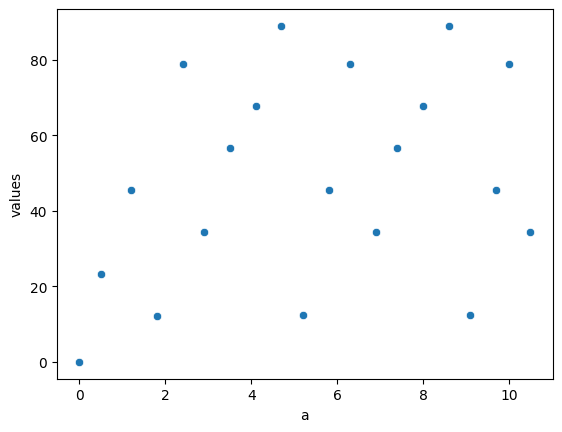

In [43]:
sns.scatterplot(df, x='a', y='values')

Also, the relationship between `b` and `values` are random but can be clustered

<Axes: xlabel='b', ylabel='values'>

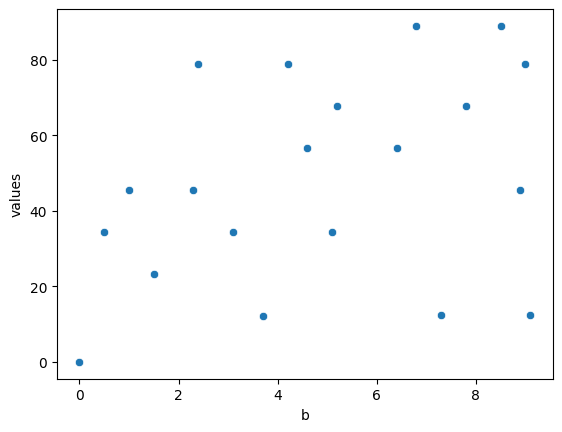

In [44]:
sns.scatterplot(df, x='b', y='values')

The relationship between `a` and `b` is linear, but they are inputs

<Axes: xlabel='a', ylabel='b'>

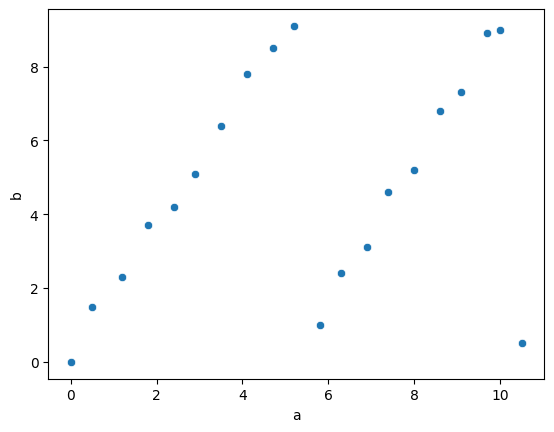

In [45]:
sns.scatterplot(df, x='a', y='b')

## Linear Regression

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics

Splitting the data into training and testing, 80% for training and 20% for testing

In [17]:
x = data[:, :2]
y = data[:, 2] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [19]:
multi_lr = LinearRegression()
multi_lr.fit(x_train, y_train)

LinearRegression()

In [20]:
lr_pred = multi_lr.predict(x_test)

## k-Nearest Neighbours

In [21]:
from sklearn.neighbors import KNeighborsRegressor

As we were able to find, 5 sectors in the scatterplot. I've set neighbours to 5

In [22]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [23]:
knn_regressor.fit(x_train, y_train)

KNeighborsRegressor()

In [24]:
knn_preds = knn_regressor.predict(x_test)

## RandomForest

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
rfr_model = RandomForestRegressor(n_estimators=100)
rfr_model.fit(x, y)

RandomForestRegressor()

In [27]:
rfr_preds = rfr_model.predict(x_test)

## Support-Vector Regressor

In [28]:
from sklearn.svm import SVR

In [29]:
svr_model = SVR(kernel='rbf')
svr_model.fit(x, y)

SVR()

In [30]:
svr_preds = svr_model.predict(x_test)

## MLP-Regressor

In [31]:
from sklearn.neural_network import MLPRegressor

In [49]:
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
mlp_model.fit(x, y)

/home/prasanna/anaconda3/envs/jupyterlab/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(max_iter=1000)

In [50]:
mlp_pred = mlp_model.predict(x_test)

## Results

Function to print R-Squared Score, MSE and MAE

In [51]:
def printErrorRes(y_pred, model):
    meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
    meanSqErr = metrics.mean_squared_error(y_test, y_pred)
    
    print('R-Squared Score: ', model.score(x_train, y_train)*100)
    print('Mean Absolute Error:', meanAbErr)
    print('Mean Square Error:', meanSqErr)

In [52]:
print("Linear Regression Results")
printErrorRes(lr_pred, multi_lr)

Linear Regression Results
R-Squared Score:  16.318427561646807
Mean Absolute Error: 19.735365762150128
Mean Square Error: 511.2723413395831


In [53]:
print("k-Nearest Neighbours Results")
printErrorRes(knn_preds, knn_regressor)

k-Nearest Neighbours Results
R-Squared Score:  8.705509827440206
Mean Absolute Error: 19.930000000000003
Mean Square Error: 515.4918000000001


In [54]:
print("RandomForest Regression Results")
printErrorRes(rfr_preds, rfr_model)

RandomForest Regression Results
R-Squared Score:  79.18234603473205
Mean Absolute Error: 9.482000000000031
Mean Square Error: 115.19002600000081


In [55]:
print("Support-Vector Regression Results")
printErrorRes(svr_preds, svr_model)

Support-Vector Regression Results
R-Squared Score:  3.938351155164155
Mean Absolute Error: 19.148223529487076
Mean Square Error: 547.0886523451259


In [56]:
print("Multi Layer Perceptron Regression Results")
printErrorRes(mlp_pred, mlp_model)

Multi Layer Perceptron Regression Results
R-Squared Score:  12.53169817870189
Mean Absolute Error: 19.932205347979863
Mean Square Error: 618.7627101966866


## Conclusion

<table border="1">
  <thead>
    <tr>
      <th>Model</th>
      <th>R-Squared Score</th>
      <th>Mean Absolute Error (MAE)</th>
      <th>Mean Square Error (MSE)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Linear Regression</td>
      <td>16.32%</td>
      <td>19.74</td>
      <td>511.27</td>
    </tr>
    <tr>
      <td>k-Nearest Neighbors</td>
      <td>8.71%</td>
      <td>19.93</td>
      <td>515.49</td>
    </tr>
    <tr>
      <td>Random Forest Regression</td>
      <td>79.18%</td>
      <td>9.48</td>
      <td>115.19</td>
    </tr>
    <tr>
      <td>Support Vector Regression</td>
      <td>3.94%</td>
      <td>19.15</td>
      <td>547.09</td>
    </tr>
    <tr>
      <td>Multi-Layer Perceptron</td>
      <td>13.84%</td>
      <td>20.61</td>
      <td>616.89</td>
    </tr>
  </tbody>
</table>

From the above table, we can conclude that Random Forest Regression is the best model with 79% accuracy, although it's MSE and MAE are high. They performed well comparing to other models

I've built a terminal based application in `predict.py`. To get the input from the user and produce the predicted output